# Spectral Partitioning of Bipartite Graphs

---

Typical example of bipartite graph is a graph obtained from a collection of documents presented as a _term $\times$ document_  matrix.

## Prerequisites

The reader should be familiar with k-means algorithm and spectral graph partitioning theory and algorithms.
 
## Competences 

The reader should be able to apply spectral partitioning of bipartite graphs to data clustering problems.

__Credits__: The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: #1 "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

---

## Definitions

__Undirected bipartite graph__ $G$ is a triplet 
$G=(T,D,E)$, where $T=\{t_{1},\cdots ,t_{m}\}$ and 
$D=\{d_{1},...,d_{n}\}$ are two sets of vertices and
$E=\{(t_{i},d_{j}):t_{i}\in R,d_{j}\in D\}$, 
is a set of edges.

$G$ is __weighted__ if there is weight $\omega(e)$ associated with each edge $e\in E$.

For example, $D$ is a set of documents, 
$T$ is a set of terms (words) and  edge $e=(t_{i},d_{j})$ exists if
document $d_{j}$ contains term $t_{i}$. Weight $\omega(e)$ can be number of appearances 
of the term $t_i$ in the document $d_j$.

A __term-by-document-matrix__ is a matrix $A\in\mathbb{R}^{m\times n}$ with 
$A_{ij}=\omega((t_i,d_j))$.

## Facts

1. The weight matrix of $G$ is $W=\begin{bmatrix}0 & A \\ A^{T} & 0 \end{bmatrix}$.

2. The Laplacian matrix of $G$ is 
$L=\begin{bmatrix} \Delta_{1} & -A \\ -A^{T} & \Delta_{2}\end{bmatrix}$,
where $\Delta_1$ and $\Delta_2$ are diagonal matrices with elements 
$\Delta_{1,ii}=\sum\limits_{j=1}^n A_{ij}$ for $i=1,\ldots,m$, and 
$\Delta_{1,jj}=\sum\limits_{i=1}^m A_{ij}$ for $j=1,\ldots,n$.

3. The normalized Laplacian matrix of $G$ is 
$L_n=\begin{bmatrix}
I & -\Delta_{1}^{-\frac{1}{2}}A\Delta_{2}^{-\frac{1}{2}} \\
-\Delta_{2}^{-\frac{1}{2}}A^T\Delta_{1}^{-\frac{1}{2}} & I
\end{bmatrix} \equiv 
\begin{bmatrix} I & -A_n \\ -A_n^T & I \end{bmatrix}$.

4. Let $\lambda$ be an eigenvalue of $L_n$ with an eigenvector 
$w=\begin{bmatrix} u \\ v\end{bmatrix}$, where 
$u\in \mathbb{R}^{m}$ $v\in\mathbb{R}^{n}$.
Then $L_n w=\lambda w$ implies
$A_n v =(1-\lambda)u$ and $A_n^T u=(1-\lambda)v$. Vice versa, if $(u,\sigma,v)$ is a singular triplet of $A_n$, then $1-\sigma$ is an eigenvalue of $L_n$ with (non-unit) eigenvector $w=\begin{bmatrix} u \\ v\end{bmatrix}$. 

5. The second largest singular value of $A_n$ corresponds to the second smallest eigenvalue of $L_n$, and computing the former is numerically more stable. 

5. _Bipartitioning algorithm_ is the following:
    1. For given $A$ compute $A_{n}$.
    2. Compute singular vectors of $A_{n}$, $u^{[2]}$ and $v^{[2]}$, which correspond to 
    the second largest singular value, $\sigma_2(A_n)$.
    3. Assign the partitions $T=\{T_1,T_2\}$ and $D=\{D_1,D_2\}$ according to the signs of 
    $u^{[2]}$ and $v^{[2]}$. The pair $(T,D)$ is now partitioned as 
    $\{(T_1,D_1),(T_2,D_2)\}$.


6. _Recursive bipartitioning algorithm_ is the following:
    1. Compute the bipartition $\pi=\{(T_1,D_1),(T_2,D_2)\}$ of 
    $(T,D)$. Set the counter $c=2$.
    2. While $c<k$ repeat
         1. compute bipartitions of each of the subpartitions of $(T,D)$,
         2. among all $(c+1)$-subpartitions, choose the one with the smallest 
         $pcut(\pi_{c+1})$ or $ncut(\pi_{c+1})$, respectively.
    3. Set $c=c+1$
    3. Stop

7. _Multipartitioning algorithm_ is the following:
    1. For given $A$ compute $A_{n}$.
    2. Compute $k$ left and right singular vectors, $u^{[1]},\ldots,u^{[k]}$ and 
    $v^{[1]},\ldots,v^{[k]}$, which correspond to $k$ largest singular values 
    $\sigma_1\geq \cdots \geq \sigma_k$ of $A_n$.
    3. Partition the rows of matrices 
    $\Delta_{1}^{-\frac{1}{2}}\begin{bmatrix} u^{[1]} & \ldots & u^{[k]}\end{bmatrix}$
    and 
    $\Delta_{2}^{-\frac{1}{2}}\begin{bmatrix} v^{[1]} & \ldots & v^{[k]}\end{bmatrix}$
    with the k-means algorithm.

### Example - Small term-by- document matrix

In [2]:
using Graphs
using IJuliaPortrayals
using Clustering

In [3]:
# Sources, targets, and weight
dn=[6,6,6,7,7,7]
tn=[1,2,3,2,4,5]
wn=[3,1,2,3,2,3]
[dn tn wn]

6×3 Array{Int64,2}:
 6  1  3
 6  2  1
 6  3  2
 7  2  3
 7  4  2
 7  5  3

In [4]:
G = inclist(ExVertex, ExEdge{ExVertex}; is_directed=false)
for i=1:5
    add_vertex!(G, ExVertex(i,"$i"))
    attrs=attributes(G.vertices[i],G)
    attrs["label"]="Term $i"
end

for i=1:2
    add_vertex!(G, ExVertex(i+5,"$(i+5)"))
    attrs=attributes(G.vertices[i+5],G)
    attrs["label"]="Document $i"
end

for i=1:6
    add_edge!(G, vertices(G)[dn[i]], vertices(G)[tn[i]])
end
for i=1:length(G.inclist)
    for j=1:length(G.inclist[i])
        ei=G.inclist[i][j]
        attrs = attributes(ei, G)
        attrs["label"] = wn[edge_index(ei,G)]
    end
end

In [6]:
# Plot
GraphViz(to_dot(G),"fdp","svg")

IJuliaPortrayals.GraphViz("graph graphname {\n1 [\"label\"=\"Term 1\"]\n1 -- 6 [\"label\"=\"3\"]\n2 [\"label\"=\"Term 2\"]\n2 -- 6 [\"label\"=\"1\"]\n2 -- 7 [\"label\"=\"3\"]\n3 [\"label\"=\"Term 3\"]\n3 -- 6 [\"label\"=\"2\"]\n4 [\"label\"=\"Term 4\"]\n4 -- 7 [\"label\"=\"2\"]\n5 [\"label\"=\"Term 5\"]\n5 -- 7 [\"label\"=\"3\"]\n6 [\"label\"=\"Document 1\"]\n7 [\"label\"=\"Document 2\"]\n}\n","fdp","svg")

In [7]:
W=weight_matrix(G,wn)

7×7 Array{Int64,2}:
 0  0  0  0  0  3  0
 0  0  0  0  0  1  3
 0  0  0  0  0  2  0
 0  0  0  0  0  0  2
 0  0  0  0  0  0  3
 3  1  2  0  0  0  0
 0  3  0  2  3  0  0

In [8]:
A=W[1:5,6:7]
Δ1=sqrt(sum(A,2))
Δ2=sqrt(sum(A,1))
An=map(Float64,[A[i,j]/(Δ1[i]*Δ2[j]) for i=1:size(A,1), j=1:size(A,2)])

5×2 Array{Float64,2}:
 0.707107  0.0     
 0.204124  0.53033 
 0.57735   0.0     
 0.0       0.5     
 0.0       0.612372

In [9]:
# The partitioning - explain the results!
U,σ,V=svd(An)

(
[-0.46291 0.604743; -0.534522 -0.218218; … ; -0.377964 -0.370328; -0.46291 -0.453557],

[1.0,0.883883],
[-0.654654 0.755929; -0.755929 -0.654654])

In [10]:
U[:,2]

5-element Array{Float64,1}:
  0.604743
 -0.218218
  0.493771
 -0.370328
 -0.453557

In [11]:
V[:,2]

2-element Array{Float64,1}:
  0.755929
 -0.654654

### Example - Sets of points

In [12]:
using Gadfly
using Images

INFO: Recompiling stale cache file C:\Users\Ivan\.julia\lib\v0.5\Images.ji for module Images.


In [13]:
?sprand

search: sprand sprandn sprandbool StepRange sparse2adjacencylist



```
sprand([rng],[type],m,[n],p::AbstractFloat,[rfn])
```

Create a random length `m` sparse vector or `m` by `n` sparse matrix, in which the probability of any element being nonzero is independently given by `p` (and hence the mean density of nonzeros is also exactly `p`). Nonzero values are sampled from the distribution specified by `rfn` and have the type `type`. The uniform distribution is used in case `rfn` is not specified. The optional `rng` argument specifies a random number generator, see [Random Numbers](:ref:`Random Numbers <random-numbers>`).


In [14]:
# Define sizes
m=[200,100,100]
n=[100,200,100]
density=[0.5,0.7,0.4]
A=Array(Any,3)
for i=1:3
    A[i]=sprand(m[i],n[i],density[i])
end
B=blkdiag(A[1],A[2],A[3])

400×400 sparse matrix with 28103 Float64 nonzero entries:
	[1  ,   1]  =  0.140567
	[2  ,   1]  =  0.172942
	[3  ,   1]  =  0.759195
	[10 ,   1]  =  0.241753
	[11 ,   1]  =  0.0331051
	[15 ,   1]  =  0.521354
	[16 ,   1]  =  0.439441
	[17 ,   1]  =  0.0734891
	[19 ,   1]  =  0.90605
	[22 ,   1]  =  0.498536
	⋮
	[362, 400]  =  0.0233995
	[375, 400]  =  0.33304
	[378, 400]  =  0.351691
	[379, 400]  =  0.329812
	[380, 400]  =  0.819083
	[382, 400]  =  0.0434167
	[385, 400]  =  0.626082
	[390, 400]  =  0.430699
	[392, 400]  =  0.742641
	[394, 400]  =  0.892444
	[399, 400]  =  0.327217

In [15]:
pB=spy(B)
draw(Gadfly.PNG("files/pB.png", 4inch, 4inch), pB)

INFO: Recompiling stale cache file C:\Users\Ivan\.julia\lib\v0.5\ImageMagick.ji for module ImageMagick.


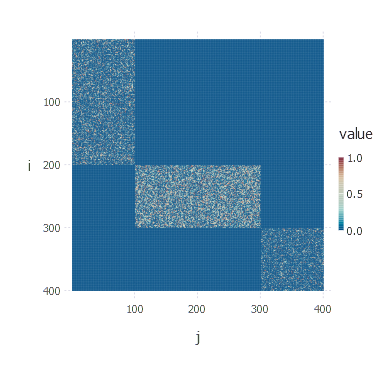

In [16]:
load("files/pB.png")

In [17]:
# The structure of singular vectors reflects the blocks
S,rest=svds(B,nsv=3)

(Base.LinAlg.SVD{Float64,Float64,Array{Float64,2}}([4.01579e-18 -0.0753605 -1.70941e-18; 3.76645e-17 -0.0685166 6.06728e-18; … ; -1.65347e-17 -1.39179e-17 0.103866; -2.50266e-17 -1.09204e-17 0.0915093],[49.944,35.9609,20.772],[-6.01174e-17 -0.0888007 2.09424e-18; -8.49376e-17 -0.100971 -5.53629e-17; … ; -3.10912e-17 4.75296e-18 0.1205; 8.14487e-18 3.59188e-18 0.0927098]),6,2,34,[-0.0134566,0.137833,-0.0805106,0.148082,0.013049,-0.0228716,-0.165844,0.0373315,0.145493,0.107701  …  0.0137897,-0.0869225,0.0465791,0.146341,-0.0795515,0.0989266,-0.0248677,-0.0193879,-0.155321,0.0384244])

In [18]:
# S is a structure
fieldnames(S)

3-element Array{Symbol,1}:
 :U 
 :S 
 :Vt

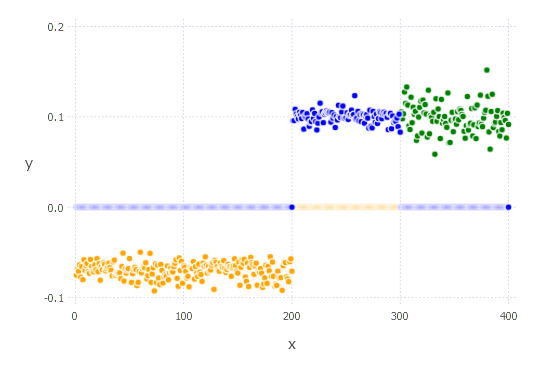

In [19]:
# Plot the first three left singular vectors
k=size(B,1)
x=collect(1:k)
Gadfly.plot(layer(x=x,y=S.U[:,1],Geom.point,Theme(default_color=colorant"blue")),
layer(x=x,y=S.U[:,2], Geom.point,Theme(default_color=colorant"orange")),
layer(x=x,y=S.U[:,3], Geom.point,Theme(default_color=colorant"green")))

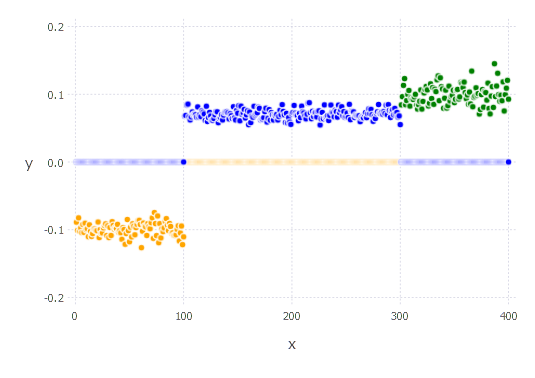

In [20]:
# Plot the first three right singular vectors
Gadfly.plot(layer(x=x,y=S.Vt[:,1],Geom.point,Theme(default_color=colorant"blue")),
layer(x=x,y=S.Vt[:,2], Geom.point,Theme(default_color=colorant"orange")),
layer(x=x,y=S.Vt[:,3], Geom.point,Theme(default_color=colorant"green")))

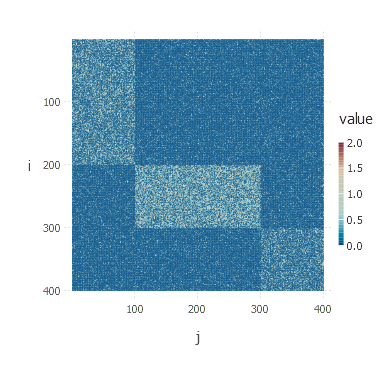

In [21]:
# Add random noise
noise=sprand(k,k,0.3)
C=B+noise
pC=spy(C)
draw(Gadfly.PNG("files/pC.png", 4inch, 4inch), pC)
load("files/pC.png")

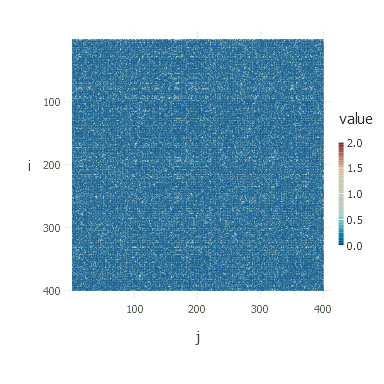

In [22]:
# Apply random permutation to rows and columns of C
D=C[randperm(k),randperm(k)]
pD=spy(D)
draw(Gadfly.PNG("files/pD.png", 4inch, 4inch), pD)
load("files/pD.png")

In [23]:
# Given D, we can recover C with spectral partitioning!!
S,rest=svds(D,nsv=3)

(Base.LinAlg.SVD{Float64,Float64,Array{Float64,2}}([-0.0680321 0.0707569 0.0154863; -0.0702047 0.0689421 0.018029; … ; -0.0449161 -0.0564276 0.0493016; -0.0734415 0.0680678 0.0261402],[98.7204,42.9384,26.2093],[-0.0390318 -0.0148716 -0.116399; -0.0551307 -0.0779427 0.0562811; … ; -0.0380658 -0.0115975 -0.083438; -0.0543952 -0.067536 0.0378546]),6,3,42,[0.303926,-0.151097,-0.0193819,-0.0861699,0.0169448,0.176187,-0.0807307,-0.129334,-0.170465,-0.162893  …  -0.0739897,0.218862,0.0700225,0.00656274,0.117467,-0.214304,0.127951,-0.188341,0.019939,-0.205395])

In [24]:
# Kmeans on rows and U and V
using Clustering

In [25]:
outU=kmeans((S.U)',3)

Clustering.KmeansResult{Float64}([-0.0379054 -0.0431332 -0.0693029; -0.0130692 -0.0492866 0.0686633; -0.0886062 0.0242162 0.0182636],[3,3,2,2,2,3,2,2,2,2  …  1,3,2,3,1,2,1,2,2,3],[1.37119e-5,9.4605e-7,0.000197751,0.000302638,2.31894e-5,0.000103891,1.56687e-5,3.99618e-6,0.000475207,4.40757e-5  …  0.000642007,0.000150997,9.67816e-5,0.000163748,0.000250568,3.96031e-5,2.55656e-5,0.000439623,0.000683451,7.95234e-5],[100,200,100],[100.0,200.0,100.0],0.09380808557862313,2,true)

In [26]:
outV=kmeans((S.Vt)',3)

Clustering.KmeansResult{Float64}([-0.0375002 -0.0516636 -0.0542002; -0.0205457 -0.0749885 0.042723; -0.087393 0.0376483 0.0123331],[1,2,3,1,2,3,3,3,2,3  …  2,2,2,3,2,3,2,3,1,2],[0.000875874,0.000367929,8.73378e-5,0.000397392,0.000204507,0.000117202,0.000276196,0.000329597,5.94026e-5,0.00037714  …  0.000252685,0.000204563,0.000292673,0.000204469,0.000157664,7.31289e-5,7.6175e-6,5.64393e-5,9.60321e-5,6.30448e-5],[100,100,200],[100.0,100.0,200.0],0.099424117528641,2,true)

In [27]:
sortperm(outV.assignments)

400-element Array{Int64,1}:
   1
   4
  18
  24
  25
  27
  34
  36
  41
  43
  44
  47
  52
   ⋮
 373
 374
 376
 377
 380
 381
 382
 383
 386
 394
 396
 398

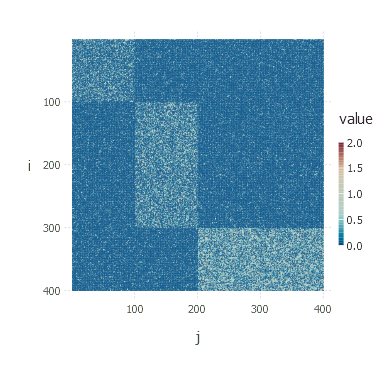

In [28]:
E=D[sortperm(outU.assignments),sortperm(outV.assignments)]
pE=spy(E)
draw(Gadfly.PNG("files/pE.png", 4inch, 4inch), pE)
load("files/pE.png")